## Audience Imact on Games in Europe 2019-20

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [67]:
# The data files for each league
epl_att_data = "../final-resources/EPL/EPL_scores_attendances.csv"
bun_att_data = "../final-resources/BUN/BUN_scores_attendances.csv"
lig_att_data = "../final-resources/LIG/LIG_scores_attendances.csv"
ser_att_data = "../final-resources/SER/SER_scores_attendances.csv"
images_path = "../images/Audience_impact"

### Setting and Functions for charts

In [75]:
# The following columns will be selected from the dataset
cols = ["Date",
    "HomeTeam",
    "HomeTeam ID", 
    "HomeScore",
    "AwayTeam",
    "AwayTeam ID",
    "AwayScore", 
    "Result",
    "Attendance"]

# Data cleaning (fillna, types) and print summary numbers
def Summary(df, league):
    
    ndf = df.copy()
    s = ndf["Attendance"]
    if s.dtype == 'object':
        ndf["Attendance"] = s.str.replace(',', '').astype(float)
    ndf = ndf.fillna(0)
    
    # Filter all the rows for which there is no attendance and the match date is before Covid
    # -- Attendance data is missing
    Covid_date = "2020-04-01"
    ddf = ndf.loc[ (ndf["Attendance"]==0) & (ndf["Date"]<Covid_date) ]
    ndf.drop(ddf.index, inplace=True)
    
    # The total number of matches of the 'league' in 2019-20
    total = len(ndf['Date'])
    
    # The number of matches after COVID-19
    after = len(ndf.loc[ndf["Date"] > Covid_date])
    if league == "All":
        print(f"The number of matches of {league} teams until {ndf['Date'].at[total -1]} is {total}")
        print(f"The number of matches of {league} teams after COVID-19 is {after}")
    return ndf

In [76]:
# Load league data and clean-up
epl_all_data_df = pd.read_csv(epl_att_data)
bun_all_data_df = pd.read_csv(bun_att_data)
lig_all_data_df = pd.read_csv(lig_att_data)
ser_all_data_df = pd.read_csv(ser_att_data)
epl_df = Summary(epl_all_data_df, "EPL")
bun_df = Summary(bun_all_data_df, "BUN")
lig_df = Summary(lig_all_data_df, "LIG")
ser_df = Summary(ser_all_data_df, "SER")

# Combine four datasets to create the dataset for all matches
all_df = epl_df.append(bun_df, ignore_index=True)
all_df = all_df.append(lig_df, ignore_index=True)
all_df = all_df.append(ser_df, ignore_index=True)
all_df = Summary(all_df, "All")
all_df.describe()

The number of matches of All teams until 2020-07-13 is 1337
The number of matches of All teams after COVID-19 is 298


,HomeScore,AwayScore,Attendance
count,1337.000000,1337.000000,1337.000000
mean,1.545251,1.284966,21806.175019
std,1.280178,1.205162,22810.755768
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,17547.000000
75%,2.000000,2.000000,38517.000000
max,8.000000,9.000000,93426.000000


The r-sqared value of Hometeam wins is 0.010567342324927611
The r-sqared value of Awayteam wins is 0.005994962177759722


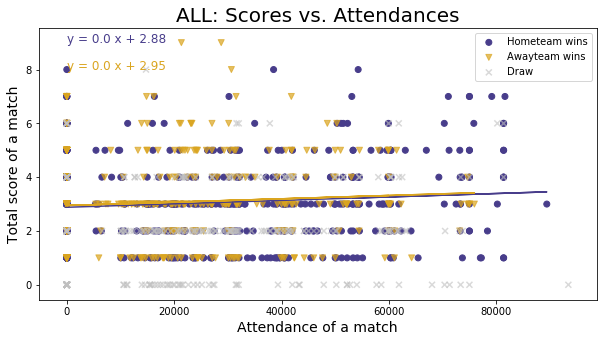

In [28]:
# Scatter plot for all matches of match total scores and attendances
Att_Score_scatter(all_df, "ALL")

In [77]:
bins = [x for x in range(1,110000,10000)]
bins_label = ["No audience"]+[f"[{num},{num+9999})" for num in bins]
bins.insert(0,0)
bins_label.pop()
all_df["Attendance Range"] = pd.cut(all_df["Attendance"], bins, labels=bins_label, right=False)

In [78]:
all_df.head()

,Div,Date,Time,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HomeTeam ID,AwayTeam ID,City,Team ID,Opponent,Attendance,City,Attendance Range
0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,H,EPL9,EPL13,Liverpool,EPL9,Norwich City,53333.0,0,"[50001,60000)"
1,E0,2019-08-10,12:30,West Ham,Man City,0,5,A,EPL18,EPL10,London,EPL18,Manchester City,59870.0,0,"[50001,60000)"
2,E0,2019-08-10,15:00,Watford,Brighton,0,3,A,EPL17,EPL3,Watford,EPL17,Brighton & Hove Albion,20245.0,0,"[20001,30000)"
3,E0,2019-08-10,17:30,Tottenham,Aston Villa,3,1,H,EPL16,EPL1,London,EPL16,Aston Villa,60407.0,0,"[60001,70000)"
4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,EPL6,EPL7,London,EPL6,Everton,25151.0,0,"[20001,30000)"


In [79]:
wins_in_range = all_df.groupby("Attendance Range")
no_att = wins_in_range.get_group("No audience")
no_att.count()

Div                 519
Date                519
Time                519
HomeTeam            519
AwayTeam            519
HomeScore           519
AwayScore           519
Result              519
HomeTeam ID         519
AwayTeam ID         519
 City               519
Team ID             519
Opponent            519
Attendance          519
City                519
Attendance Range    519
dtype: int64

In [83]:
epl_df.loc[epl_df["Attendance"]==0]

,Div,Date,Time,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HomeTeam ID,AwayTeam ID,City,Team ID,Opponent,Attendance
34,E0,2019-08-31,15:00,Crystal Palace,Aston Villa,1,0,H,EPL6,EPL1,London,EPL6,Aston Villa,0.0
67,E0,2019-09-28,15:00,Crystal Palace,Norwich,2,0,H,EPL6,EPL13,London,EPL6,Norwich City,0.0
71,E0,2019-10-05,15:00,Liverpool,Leicester,2,1,H,EPL9,EPL8,Liverpool,EPL9,Leicester City,0.0
73,E0,2019-10-05,15:00,Watford,Sheffield United,0,0,D,EPL17,EPL14,Watford,EPL17,Sheffield United,0.0
110,E0,2019-11-03,16:30,Everton,Tottenham,1,1,D,EPL7,EPL16,Liverpool,EPL7,Manchester United Women,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,E0,2020-07-12,14:15,Aston Villa,Crystal Palace,2,0,H,EPL1,EPL6,Birmingham,EPL1,Crystal Palace,0.0
347,E0,2020-07-12,12:00,Wolves,Everton,3,0,H,EPL19,EPL7,Wolverhampton,EPL19,Everton,0.0
348,E0,2020-07-12,19:00,Bournemouth,Leicester,4,1,H,EPL2,EPL8,Bournemouth,EPL2,Leicester City,0.0
349,E0,2020-07-12,16:30,Tottenham,Arsenal,2,1,H,EPL16,EPL0,London,EPL16,Arsenal,0.0


In [81]:
bun_df.loc[bun_df["Attendance"]==0].count()

Div            84
Date           84
Time           84
HomeTeam       84
AwayTeam       84
HomeScore      84
AwayScore      84
Result         84
HomeTeam ID    84
AwayTeam ID    84
City           84
Team ID        84
Opponent       84
Attendance     84
dtype: int64

In [82]:
lig_df.loc[lig_df["Attendance"]==0].count()

Div            97
Date           97
Time           97
HomeTeam       97
AwayTeam       97
HomeScore      97
AwayScore      97
Result         97
HomeTeam ID    97
AwayTeam ID    97
City           97
Team ID        97
Opponent       97
Attendance     97
dtype: int64

In [85]:
zero = lig_df.loc[(lig_df["Attendance"]==0)]

In [87]:
zero.loc[zero["Date"]<"2020-04-01"]

,Div,Date,Time,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HomeTeam ID,AwayTeam ID,City,Team ID,Opponent,Attendance
101,SP1,2019-10-30,18:00,Sociedad,Levante,1,2,A,LIG16,LIG11,San Sebastian,LIG16,Levante,0.0
102,SP1,2019-10-30,18:00,Valencia,Sevilla,1,1,D,LIG17,LIG15,Valencia,LIG17,Sevilla,0.0
103,SP1,2019-10-30,20:00,Betis,Celta,2,1,H,LIG4,LIG5,Seville,LIG4,Celta Vigo,0.0
104,SP1,2019-10-30,20:15,Real Madrid,Leganes,5,0,H,LIG14,LIG10,Madrid,LIG14,Leganés,0.0
105,SP1,2019-10-30,19:00,Ath Bilbao,Espanol,3,0,H,LIG1,LIG7,Bilbao,LIG1,Espanyol,0.0
239,SP1,2020-02-21,20:00,Betis,Mallorca,3,3,D,LIG4,LIG12,Seville,LIG4,Mallorca,0.0
269,SP1,2020-03-10,19:00,Eibar,Sociedad,1,2,A,LIG6,LIG16,Eibar,LIG6,Real Sociedad,0.0


In [89]:
temp_df = lig_df.loc[ (lig_df["Attendance"]==0) & (lig_df["Date"] < "2020-04-01")   ]

In [90]:
temp_df.index

Int64Index([101, 102, 103, 104, 105, 239, 269], dtype='int64')

In [91]:
lig_df.drop(temp_df.index)

,Div,Date,Time,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HomeTeam ID,AwayTeam ID,City,Team ID,Opponent,Attendance
0,SP1,2019-08-16,20:00,Ath Bilbao,Barcelona,1,0,H,LIG1,LIG3,Bilbao,LIG1,Barcelona,47693.0
1,SP1,2019-08-17,19:00,Mallorca,Eibar,2,1,H,LIG12,LIG6,Palma,LIG12,Eibar,15127.0
2,SP1,2019-08-17,20:00,Leganes,Osasuna,0,1,A,LIG10,LIG13,Leganes,LIG10,Osasuna,10020.0
3,SP1,2019-08-17,18:00,Valencia,Sociedad,1,1,D,LIG17,LIG16,Valencia,LIG17,Real Sociedad,41846.0
4,SP1,2019-08-17,20:00,Villarreal,Granada,4,4,D,LIG19,LIG9,Villarreal,LIG19,Granada,14753.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,SP1,2020-07-12,21:00,Sevilla,Mallorca,2,0,H,LIG15,LIG12,Seville,LIG15,Mallorca,0.0
356,SP1,2020-07-12,16:00,Levante,Ath Bilbao,1,2,A,LIG11,LIG1,Valencia,LIG11,Athletic Bilbao,0.0
357,SP1,2020-07-13,21:00,Granada,Real Madrid,1,2,A,LIG9,LIG14,Granada,LIG9,Real Madrid,0.0
358,SP1,2020-07-13,18:30,Alaves,Getafe,0,0,D,LIG0,LIG8,Vitoria-Gasteiz,LIG0,Getafe,0.0
